In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('Medical_insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(2772, 7)

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df['region'].value_counts().reset_index()

,region,count
0,southeast,766
1,southwest,684
2,northwest,664
3,northeast,658


In [12]:
df['sex'].value_counts().reset_index()

,sex,count
0,male,1406
1,female,1366


In [13]:
df['children'].value_counts().reset_index()

,children,count
0,0,1186
1,1,672
2,2,496
3,3,324
4,4,52
5,5,42


In [14]:
df['smoker'].value_counts().reset_index()

,smoker,count
0,no,2208
1,yes,564


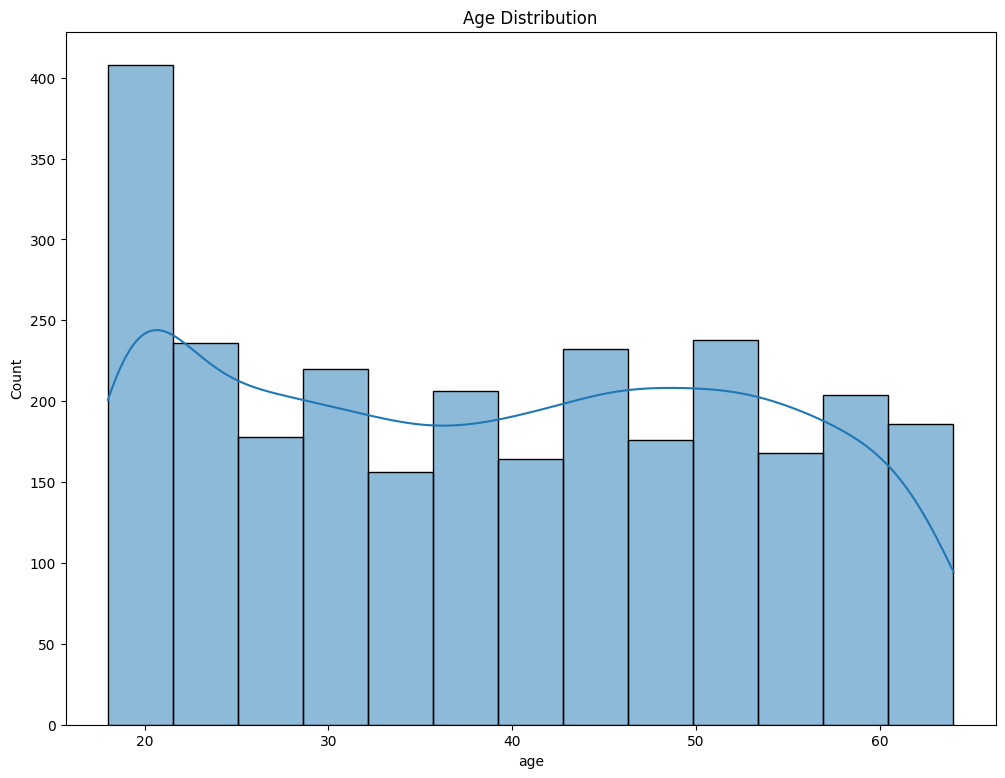

In [15]:
plt.figure(figsize=(12,9))
sns.histplot(df['age'],kde=True)
plt.title("Age Distribution")
plt.show()

nsights You Could Mention in an Analysis:
Young population dominant: The majority of individuals are in their 20s.

Potential bimodal distribution: One peak in early 20s and another around the 50s.

Age skew: Slight right-skewness (longer tail on the right) suggesting some older individuals in the sample.

Use-case suggestion: If this is for a customer segmentation or churn dataset, you might want to segment users into age groups like:

Young (18–30)

Adult (31–50)

Senior (51+)



In [16]:
age_skewness = df['age'].skew()
print("Skewness of age column",age_skewness)

Skewness of age column 0.061638859731918856


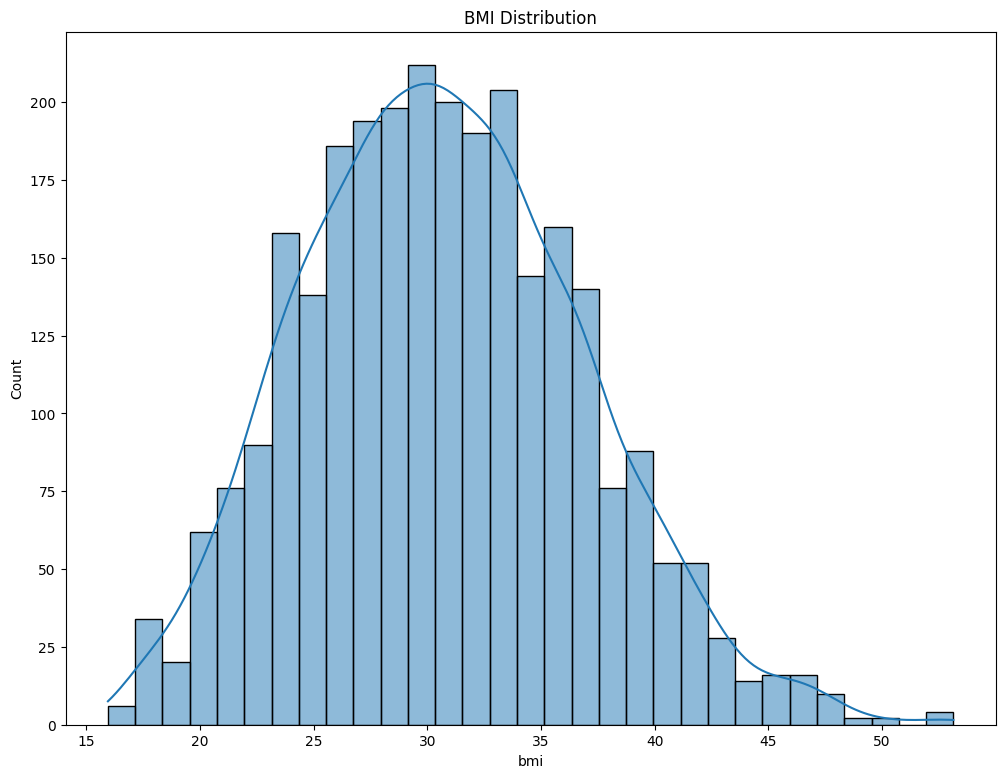

In [17]:
plt.figure(figsize=(12,9))
sns.histplot(df['bmi'],kde=True)
plt.title("BMI Distribution")
plt.show()

In [18]:
bmi_skewness = df['bmi'].skew()
print("Skewness of bmi column",bmi_skewness)

Skewness of bmi column 0.27994423304168925


In [19]:


clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = df.copy()
data_copy.replace(clean_data, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_4560\2705384151.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_copy.replace(clean_data, inplace=True)


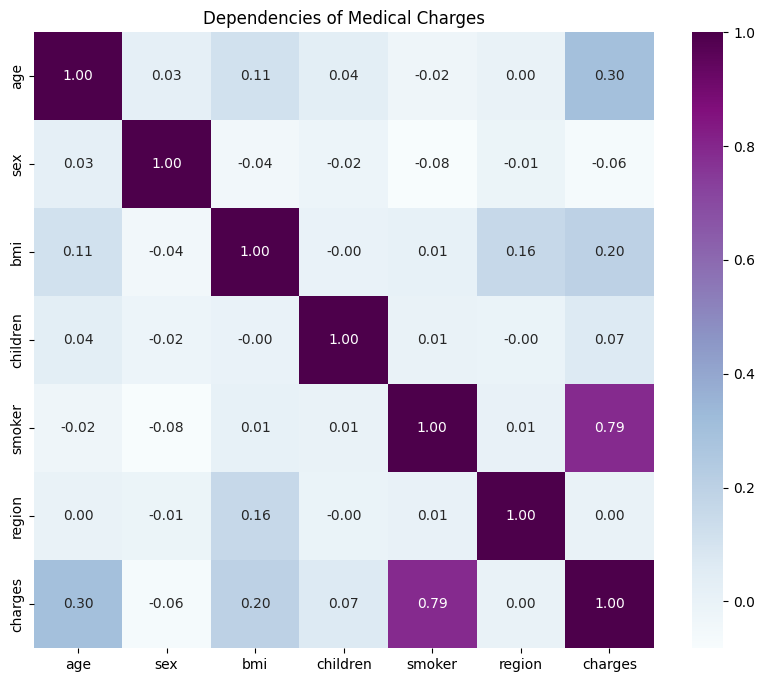

In [20]:

corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")

plt.show()

smoker and charges have high correlation

Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation

C:\Users\dell\AppData\Local\Temp\ipykernel_4560\475487712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=data_copy,palette='husl')


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

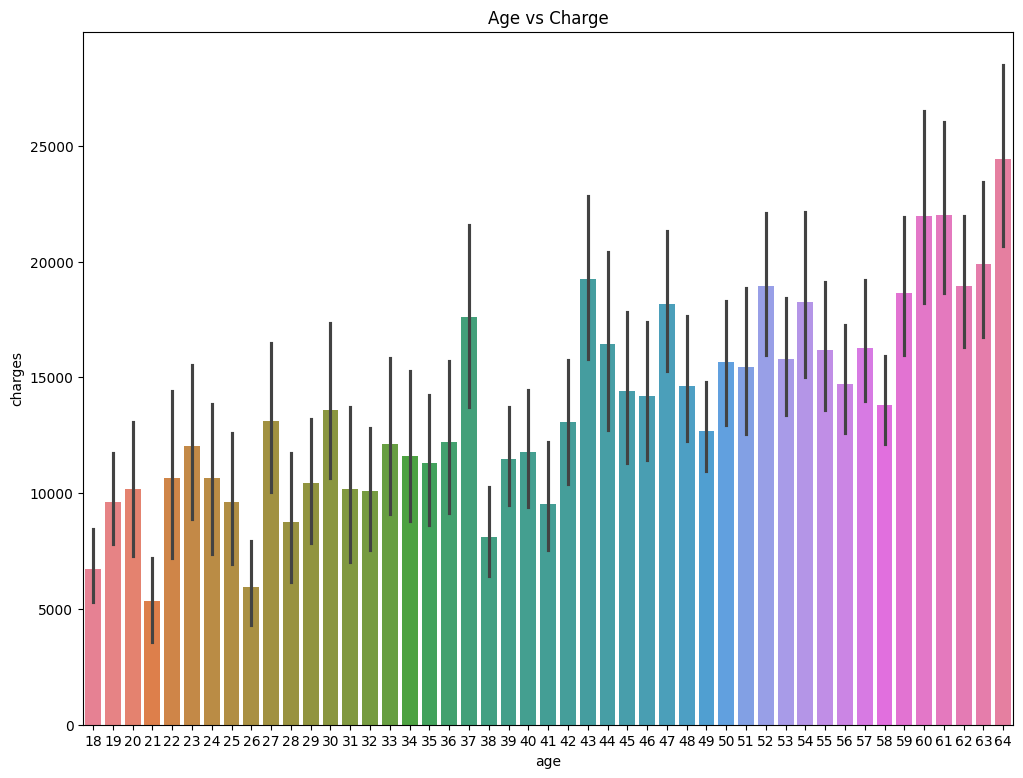

In [21]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data_copy,palette='husl')

<Axes: ylabel='count'>

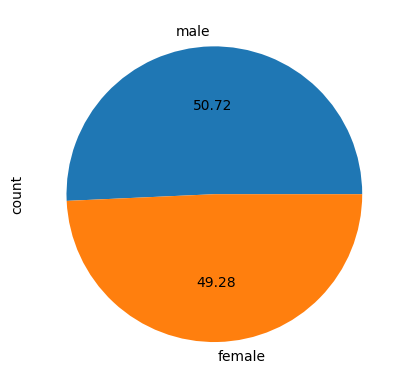

In [22]:

#Gender Column
df['sex'].value_counts().plot(kind='pie',autopct='%.2f')

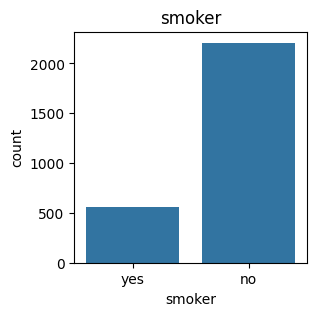

In [23]:
# smoker column
plt.figure(figsize=(3,3))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

<Figure size 600x600 with 0 Axes>

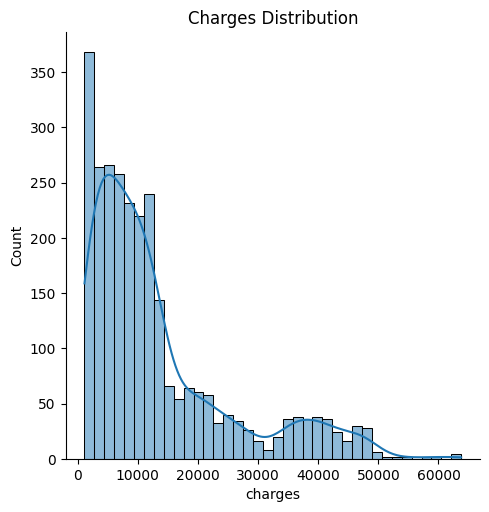

Skewness of the 'charges' column: 1.511315043602352


In [24]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.displot(df['charges'],kde=True)
plt.title('Charges Distribution')
plt.show()
charges_skewness = df['charges'].skew()

print("Skewness of the 'charges' column:", charges_skewness)

"Given the high skewness of the 'charges' column, it is necessary to apply a transformation to address this issue."

<Figure size 600x600 with 0 Axes>

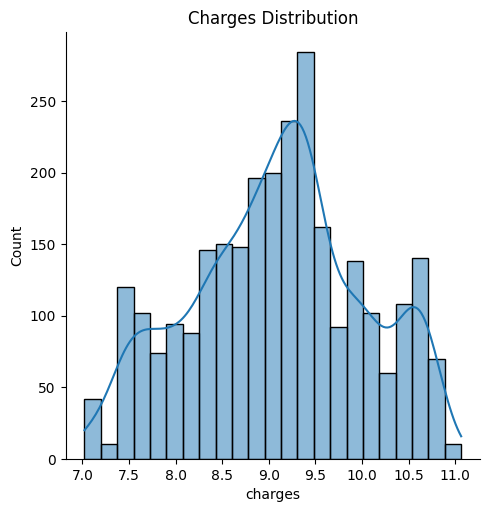

Skewness of the 'charges' column: -0.08908723369716186


In [25]:
plt.figure(figsize=(6,6))
sns.displot(np.log(df['charges']),kde=True)
plt.title('Charges Distribution')
plt.show()
charges_skewness = np.log(df['charges']).skew()

print("Skewness of the 'charges' column:", charges_skewness)

In [26]:
bins = [18,24,40, 60, 70]
labels = ['18-24', '24-40','40-60', '60-70']
df['age_interval'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
interval_charge_Average = df.groupby('age_interval')['charges'].mean()

C:\Users\dell\AppData\Local\Temp\ipykernel_4560\2827780035.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  interval_charge_Average = df.groupby('age_interval')['charges'].mean()


Text(0, 0.5, 'Total Charges')

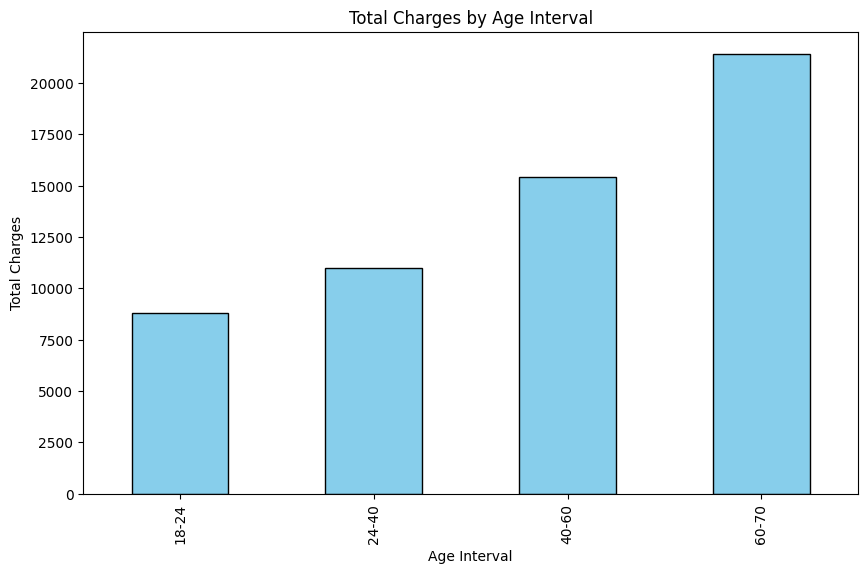

In [27]:

# Plotting
plt.figure(figsize=(10, 6))
interval_charge_Average.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Total Charges by Age Interval')
plt.xlabel('Age Interval')
plt.ylabel('Total Charges')

Age Group	Total Charges (Relative)	Interpretation
18–24	Lowest	Young, generally healthier — low medical usage.
24–40	Slightly higher	More likely to start incurring regular medical costs, especially with dependents or lifestyle-related risks.
40–60	Noticeable jump	Age-related conditions begin to show (BP, diabetes, etc.).
60–70	Highest	Seniors incur significantly higher medical costs — chronic illnesses, surgeries, etc.

In [28]:
df

,age,sex,bmi,children,smoker,region,charges,age_interval
0,19,female,27.900,0,yes,southwest,16884.92400,18-24
1,18,male,33.770,1,no,southeast,1725.55230,18-24
2,28,male,33.000,3,no,southeast,4449.46200,24-40
3,33,male,22.705,0,no,northwest,21984.47061,24-40
4,32,male,28.880,0,no,northwest,3866.85520,24-40
...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,40-60
2768,21,female,34.600,0,no,southwest,2020.17700,18-24
2769,19,male,26.030,1,yes,northwest,16450.89470,18-24
2770,23,male,18.715,0,no,northwest,21595.38229,18-24


<Axes: xlabel='bmi', ylabel='charges'>

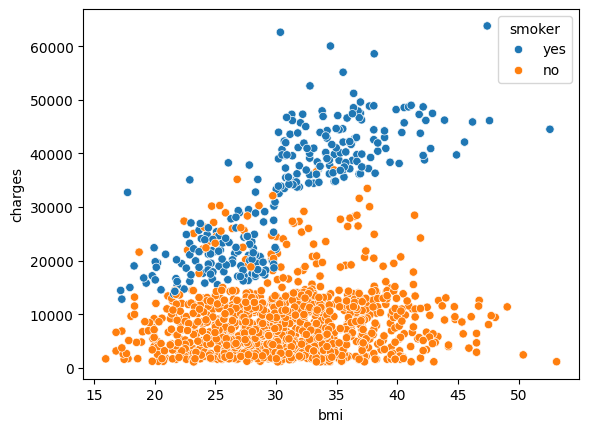

In [29]:

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

<Axes: xlabel='age', ylabel='charges'>

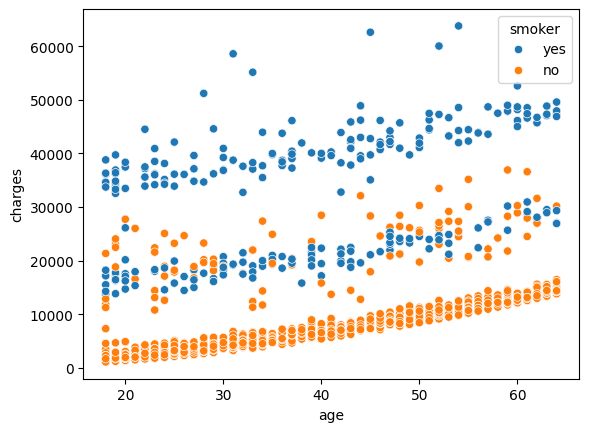

In [30]:

sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

In [31]:

#Charges per Region
region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)

C:\Users\dell\AppData\Local\Temp\ipykernel_4560\2966814839.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()


,region,charges
2,southeast,1.129756e+07
0,northeast,8.867126e+06
3,southwest,8.320310e+06
1,northwest,8.275518e+06


<Axes: xlabel='region', ylabel='charges'>

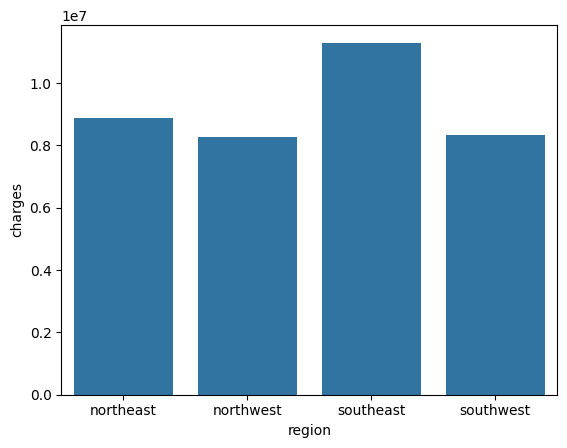

In [32]:

#Barplot Charges per Region
sns.barplot(x = 'region', y ='charges', data = region_charges)

<Axes: xlabel='region', ylabel='charges'>

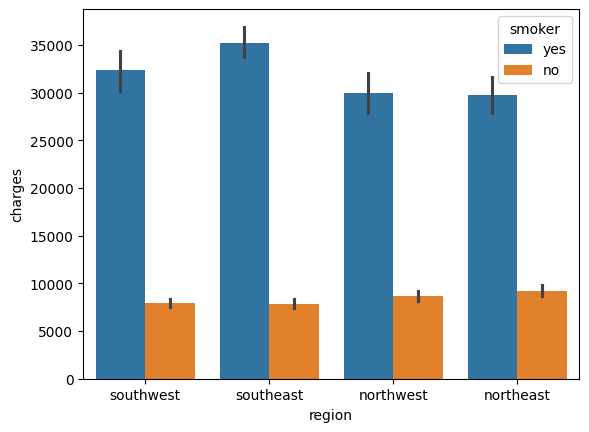

In [33]:

#Barplot with Hue Smoker
sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

<Axes: xlabel='region', ylabel='charges'>

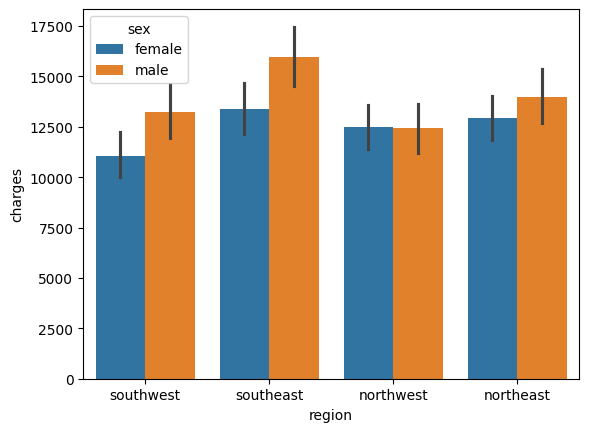

In [34]:

#Barplot with Hue Sex
sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)

In [35]:
#Preprocessing data for Algorithm
df

,age,sex,bmi,children,smoker,region,charges,age_interval
0,19,female,27.900,0,yes,southwest,16884.92400,18-24
1,18,male,33.770,1,no,southeast,1725.55230,18-24
2,28,male,33.000,3,no,southeast,4449.46200,24-40
3,33,male,22.705,0,no,northwest,21984.47061,24-40
4,32,male,28.880,0,no,northwest,3866.85520,24-40
...,...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180,40-60
2768,21,female,34.600,0,no,southwest,2020.17700,18-24
2769,19,male,26.030,1,yes,northwest,16450.89470,18-24
2770,23,male,18.715,0,no,northwest,21595.38229,18-24


In [36]:
df =df.drop(['age_interval'],axis=1)

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
X = df.drop(['charges'],axis=1)

In [39]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [40]:
y=df['charges']

In [41]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

In [195]:
from sklearn.feature_selection import mutual_info_regression

# Preprocess X
X_encoded = pd.get_dummies(X, drop_first=True)
mi_scores = mutual_info_regression(X_encoded, y)
mi_series = pd.Series(mi_scores, index=X_encoded.columns).sort_values(ascending=False)

# Display and plot
print("Mutual Information Scores:\n", mi_series)

Mutual Information Scores:
 age                 2.379389
bmi                 1.061889
children            0.666780
sex_male            0.426470
smoker_yes          0.413713
region_northwest    0.281882
region_southeast    0.267148
region_southwest    0.221741
dtype: float64


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [45]:
numeric_feats = ['age','bmi','children']
categorical_feats = ['sex','smoker','region']


In [46]:
from sklearn.preprocessing import RobustScaler

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',RobustScaler(),numeric_feats),
        ('cat',OneHotEncoder(drop='first'),categorical_feats)
    ]
)

In [48]:
y_train_log = np.log1p(y_train)  # log(1 + y)
y_test_log = np.log1p(y_test)    # for adjusted R2 (optional, if needed)

In [52]:
pipelinee = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipelinee.fit(X_train, y_train_log)

# Predict on train set
y_pred_log = pipelinee.predict(X_train)


In [53]:
#ransform predictions to original scale
y_pred_original_scale = np.expm1(y_pred_log)  # expm1 = inverse of log1p

# Evaluate on original scale (optional)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_original_scale))
train_r2 = r2_score(y_train, y_pred_original_scale)

print(f"Train RMSE (original scale): {train_rmse:.4f}")
print(f"Train R2 Score (original scale): {train_r2:.4f}")

Train RMSE (original scale): 8337.4323
Train R2 Score (original scale): 0.5242


In [1]:
!pip install statsmodels


In [2]:
import statsmodels.api as sm

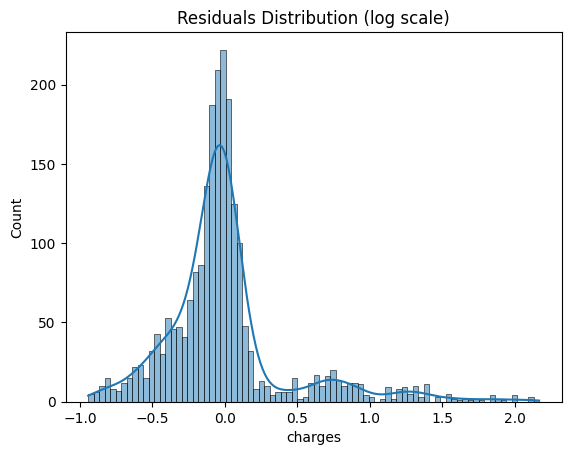

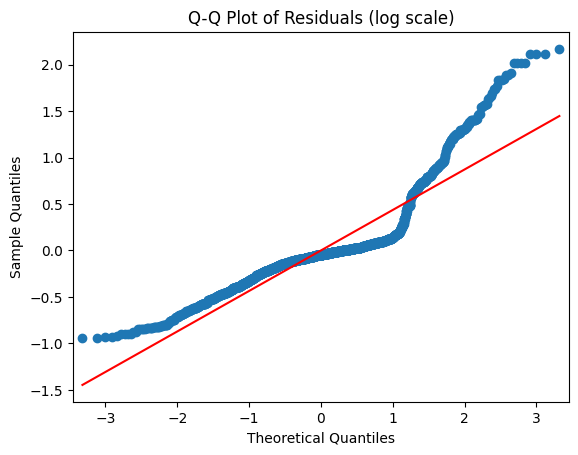

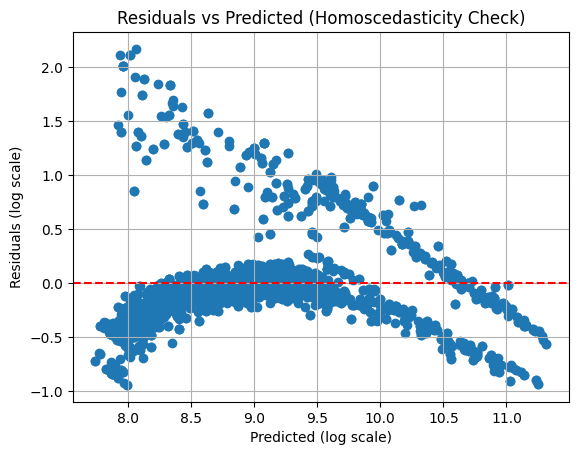

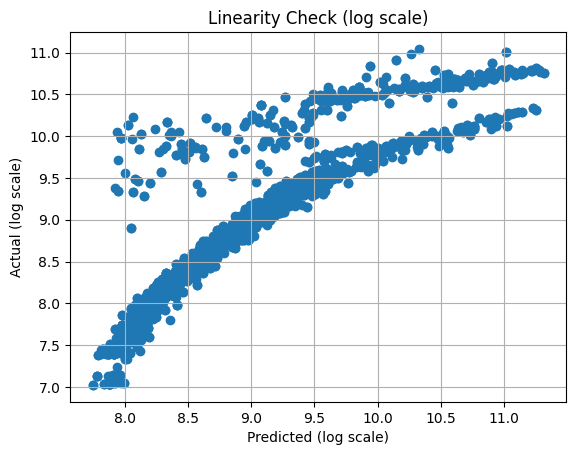

In [54]:

# Residuals (in log scale)
residuals_log = y_train_log - y_pred_log

# Plot residuals
sns.histplot(residuals_log, kde=True)
plt.title("Residuals Distribution (log scale)")
plt.show()

# Q-Q plot for normality
sm.qqplot(residuals_log, line='s')
plt.title("Q-Q Plot of Residuals (log scale)")
plt.show()

# Residuals vs Predicted
plt.scatter(y_pred_log, residuals_log)
plt.xlabel("Predicted (log scale)")
plt.ylabel("Residuals (log scale)")
plt.title("Residuals vs Predicted (Homoscedasticity Check)")
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

# Linearity Check: Predicted (log scale) vs Actual (log scale)
plt.scatter(y_pred_log, y_train_log)
plt.xlabel("Predicted (log scale)")
plt.ylabel("Actual (log scale)")
plt.title("Linearity Check (log scale)")
plt.grid(True)
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error

In [44]:
from xgboost import XGBRegressor


In [45]:
from lightgbm import LGBMRegressor

In [122]:
regressors = {
     "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100,  random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
     "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

In [123]:
import xgboost as xgb

In [124]:
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [125]:
train_results = []
test_results = []

for name, model in regressors.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train_log)

    # Predict on Test Set
    y_pred_log_test = pipe.predict(X_test)
    y_pred_test = np.expm1(y_pred_log_test)

    # Predict on Train Set
    y_pred_log_train = pipe.predict(X_train)
    y_pred_train = np.expm1(y_pred_log_train)

    # Test Metrics
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
    rmse_test = mse_test ** 0.5
    adj_r2_test = adjusted_r2_score(r2_test, len(y_test), X_train.shape[1])

    # Train Metrics
    r2_train = r2_score(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
    rmse_train = mse_train ** 0.5
    adj_r2_train = adjusted_r2_score(r2_train, len(y_train), X_train.shape[1])

    # Store Train Metrics
    train_results.append({
        'Model': name,
        'Train R2': round(r2_train, 4),
        'Train Adj R2': round(adj_r2_train, 4),
        'Train RMSE': round(rmse_train, 4),
        'Train MAPE': round(mape_train, 4)
    })

    # Store Test Metrics
    test_results.append({
        'Model': name,
        'Test R2': round(r2_test, 4),
        'Test Adj R2': round(adj_r2_test, 4),
        'Test RMSE': round(rmse_test, 4),
        'Test MAPE': round(mape_test, 4)
    })

# Create separate DataFrames
import pandas as pd
train_df = pd.DataFrame(train_results)
test_df = pd.DataFrame(test_results)

# Display results
print("Train Performance:\n", train_df)
print("\nTest Performance:\n", test_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 2217, number of used features: 8
[LightGBM] [Info] Start training from score 9.112246
Train Performance:
               Model  Train R2  Train Adj R2  Train RMSE  Train MAPE
0            Linear    0.5242        0.5229   8337.4323      0.2594
1             Ridge    0.5280        0.5267   8303.8608      0.2596
2             Lasso    0.4842        0.4828   8680.0022      0.4295
3      RandomForest    0.9867        0.9867   1391.6840      0.0354
4  GradientBoosting    0.8876        0.8873   4052.5210      0.1367
5               SVR    0.8627        0.8624   4477.9955      0.1212
6          LightGBM    0.9278        0.9276   3248.1519      0.1117
7           XGBoost    0.8843        0.8840   4110.4734      0.1397

Test Performance:
          

f:\projects\insurance premium\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
f:\projects\insurance premium\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [127]:
train_df

,Model,Train R2,Train Adj R2,Train RMSE,Train MAPE
0,Linear,0.5242,0.5229,8337.4323,0.2594
1,Ridge,0.5280,0.5267,8303.8608,0.2596
2,Lasso,0.4842,0.4828,8680.0022,0.4295
3,RandomForest,0.9867,0.9867,1391.6840,0.0354
4,GradientBoosting,0.8876,0.8873,4052.5210,0.1367
5,SVR,0.8627,0.8624,4477.9955,0.1212
6,LightGBM,0.9278,0.9276,3248.1519,0.1117
7,XGBoost,0.8843,0.8840,4110.4734,0.1397


In [128]:
test_df

,Model,Test R2,Test Adj R2,Test RMSE,Test MAPE
0,Linear,0.5124,0.5070,8651.0824,0.2939
1,Ridge,0.5165,0.5112,8614.5872,0.2944
2,Lasso,0.4958,0.4902,8797.1509,0.5219
3,RandomForest,0.9371,0.9364,3107.4927,0.1088
4,GradientBoosting,0.8608,0.8593,4622.3939,0.1610
5,SVR,0.8197,0.8177,5260.3179,0.1414
6,LightGBM,0.8847,0.8835,4206.3877,0.1613
7,XGBoost,0.8559,0.8543,4703.2397,0.1641


Hyperparamter tuning


In [93]:
param_grids = {
    "Linear": {},
    "Ridge": {"regressor__alpha": [ 1.0, 10]},
    "Lasso": {"regressor__alpha": [0.01, 0.1]},
    "RandomForest": {
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [5, 10]
    },
    "GradientBoosting": {
        "regressor__learning_rate": [0.05, 0.1],
        "regressor__n_estimators": [100, 200],
        "regressor__max_depth": [3, 5]
    },
    "SVR": {},
    'XGBoost':{
        "regressor__n_estimators": [100, 200],
        "regressor__learning_rate": [0.05, 0.1],
        "regressor__max_depth": [3, 5]   
    },
     "LightGBM": {
        "regressor__n_estimators": [100, 200],
        "regressor__learning_rate": [0.01, 0.05, 0.1],
        "regressor__num_leaves": [31, 50],
        "regressor__max_depth": [-1, 5, 10]
    },
}


In [94]:
import joblib

In [95]:
from sklearn.model_selection import GridSearchCV

results = []

for name, model in regressors.items():
    print(f"\n🔍 Tuning {name}...")
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    grid = GridSearchCV(pipe, param_grids.get(name, {}), 
                        cv=5,
                        n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse= mse**0.5
    mape = mean_absolute_percentage_error(y_test, y_pred)
    adj_r2 = adjusted_r2_score(r2, n=len(y_test), k=X_train.shape[1])

    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "R2": round(r2, 4),
        "Adj R2": round(adj_r2, 4),
        "RMSE": round(rmse, 2),
        "MAPE": round(mape, 4)
    })
    joblib.dump(best_model, f"best_model_{name}.joblib")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Final Model Comparison:")
print(results_df)



🔍 Tuning Linear...

🔍 Tuning Ridge...

🔍 Tuning Lasso...

🔍 Tuning RandomForest...

🔍 Tuning GradientBoosting...

🔍 Tuning SVR...

🔍 Tuning LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 2217, number of used features: 8
[LightGBM] [Info] Start training from score 13371.074037


f:\projects\insurance premium\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🔍 Tuning XGBoost...

📊 Final Model Comparison:
              Model                                        Best Params  \
0            Linear                                                 {}   
1             Ridge                          {'regressor__alpha': 1.0}   
2             Lasso                          {'regressor__alpha': 0.1}   
3      RandomForest  {'regressor__max_depth': 10, 'regressor__n_est...   
4  GradientBoosting  {'regressor__learning_rate': 0.1, 'regressor__...   
5               SVR                                                 {}   
6          LightGBM  {'regressor__learning_rate': 0.1, 'regressor__...   
7           XGBoost  {'regressor__learning_rate': 0.1, 'regressor__...   

       R2  Adj R2      RMSE    MAPE  
0  0.7398  0.7370   6319.27  0.4617  
1  0.7397  0.7369   6320.18  0.4627  
2  0.7398  0.7370   6319.28  0.4617  
3  0.9360  0.9353   3134.45  0.2062  
4  0.9359  0.9352   3137.56  0.2260  
5 -0.0694 -0.0811  12811.33  1.1860  
6  0.9389  0.9382  

In [96]:
results_df

,Model,Best Params,R2,Adj R2,RMSE,MAPE
0,Linear,{},0.7398,0.7370,6319.27,0.4617
1,Ridge,{'regressor__alpha': 1.0},0.7397,0.7369,6320.18,0.4627
2,Lasso,{'regressor__alpha': 0.1},0.7398,0.7370,6319.28,0.4617
3,RandomForest,"{'regressor__max_depth': 10, 'regressor__n_est...",0.9360,0.9353,3134.45,0.2062
4,GradientBoosting,"{'regressor__learning_rate': 0.1, 'regressor__...",0.9359,0.9352,3137.56,0.2260
5,SVR,{},-0.0694,-0.0811,12811.33,1.1860
6,LightGBM,"{'regressor__learning_rate': 0.1, 'regressor__...",0.9389,0.9382,3063.30,0.2777
7,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",0.9222,0.9214,3455.38,0.2443


R² > 0.92 for GB, RF, and XGB means your models explain over 92% of the variance in charges. That's excellent.

RMSE ~3100–3400 is strong for real-world regression. On insurance data, errors of ~3k are acceptable.

MAPE < 25% for the top 3 models is very good (below 20% is excellent, <30% is acceptable).

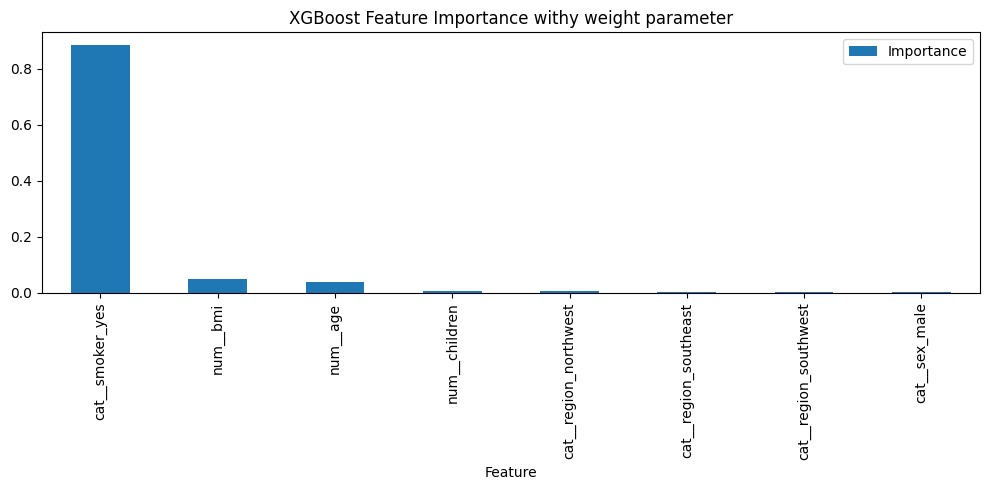

In [76]:
# After fitting XGBoost pipeline
xgb_model = regressors["XGBoost"]
pipe = Pipeline([('preprocessor', preprocessor), ('regressor', xgb_model)])
pipe.fit(X_train, y_train)

import matplotlib.pyplot as plt
importances = pipe.named_steps['regressor'].feature_importances_
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

xgb_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
xgb_importance_df.set_index("Feature").plot(kind="bar", figsize=(10, 5), title="XGBoost Feature Importance withy weight parameter")
plt.tight_layout()
plt.show()


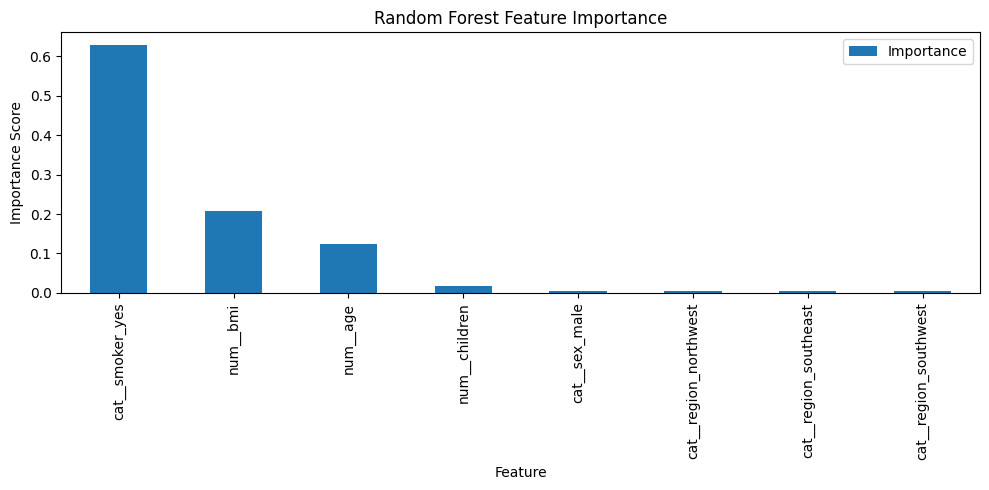

In [78]:
# Use the best Random Forest model from your tuned pipeline
rf_model = regressors["RandomForest"]
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rf_model)
])
pipe.fit(X_train, y_train)

# Extract feature importances
importances = pipe.named_steps['regressor'].feature_importances_
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

# Create DataFrame
rf_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
import matplotlib.pyplot as plt

rf_importance_df.set_index("Feature").plot(kind="bar", figsize=(10, 5), title="Random Forest Feature Importance")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


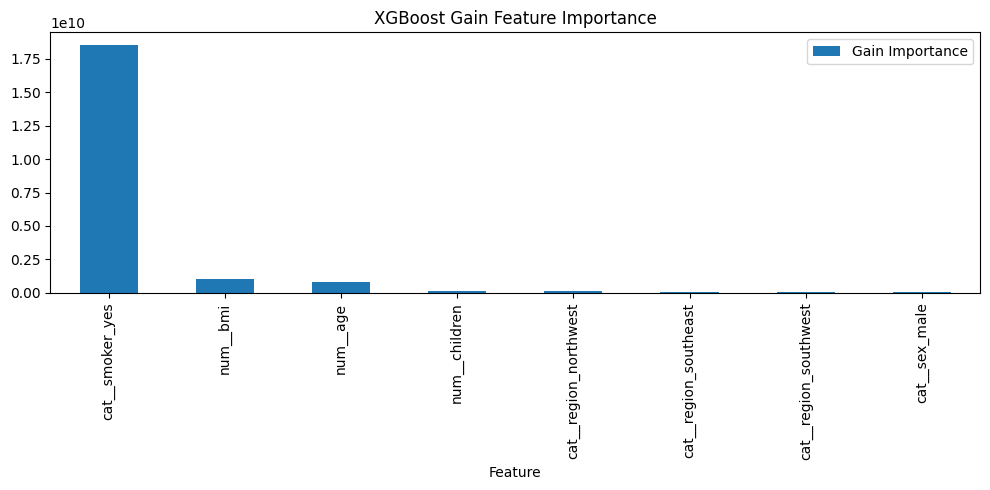

In [77]:
# Get the trained XGBoost model (booster object)
booster = pipe.named_steps['regressor'].get_booster()

# Get feature names from preprocessor
feature_names = pipe.named_steps['preprocessor'].get_feature_names_out()

# Get feature importance by 'gain'
gain_importance = booster.get_score(importance_type='gain')

# Map feature importance to feature names
importances = []
for fname in feature_names:
    # XGBoost uses f0, f1, ... so map accordingly
    f_index = list(feature_names).index(fname)
    key = f"f{f_index}"
    importances.append(gain_importance.get(key, 0))

# Create DataFrame for plotting
xgb_gain_df = pd.DataFrame({
    "Feature": feature_names,
    "Gain Importance": importances
}).sort_values(by="Gain Importance", ascending=False)

# Plot Gain-based Feature Importance
xgb_gain_df.set_index("Feature").plot(kind="bar", figsize=(10, 5), title="XGBoost Gain Feature Importance")
plt.tight_layout()
plt.show()


In [79]:
pip install shap


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached numba-0.61.2-cp311-cp311-win_amd64.whl.metadata (2.9 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   ---------- ----------------------------- 143.4/544.4 kB 4.3 MB/s eta 0:00:01
   ---------------------------------------  542.7/544.4 kB 8.5 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 6.8 MB/s eta 0:00:00
Using cached numba-0.61.2-cp311-cp311-win_amd64.whl (2.8 MB)
Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl (12.9 MB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)
Using cached llvmlite-0.44.0-cp311-cp311-win_amd64.whl (30.3 MB)
  Attempting uninstall: numpy
    Found existing i

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
best_rf = best_model
import shap

ImportError: Numba needs NumPy 2.2 or less. Got NumPy 2.3.

In [70]:
rf_model = best_rf.named_steps['regressor']
X_transformed = best_rf.named_steps['preprocessor'].transform(X_test)


In [71]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_transformed)


NameError: name 'shap' is not defined